In [1]:
# Required installations
!pip install sklearn --upgrade

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /Users/shouachang/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 8.3MB 9.3MB/s eta 0:00:01
     |████████████████████████████████| 13.9MB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 27.4MB 383kB/s  eta 0:00:01


In [59]:
# # Dependencies to Visualize the model
%matplotlib inline
import matplotlib.pyplot as plt
from pyspark import SparkFiles
import pandas as pd
import numpy as np

# Sklearn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [60]:
# Import data
wine = pd.read_csv('wine_red_white_merge.csv')

# Display data
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_binary,wine_binary
0,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,0,1
1,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,0,1
2,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,0,1
3,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,0,1
4,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,0,1


In [61]:
# Assign variables and target
target = wine['quality']
target_names = ['low', 'high']

In [62]:
# Drop target column
data = wine.drop('quality', axis=1)
feature_names = data.columns
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_binary,wine_binary
0,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,0,1
1,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,0,1
2,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,0,1
3,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,0,1
4,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,0,1


In [63]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
y_pred

array([6, 5, 6, ..., 5, 5, 7])

Confusion matrix, without normalization
[[  0   0   4   3   0   0   0]
 [  0   0  35  30   0   0   0]
 [  0   0 382 160   0   0   0]
 [  0   0 230 487   0   0   0]
 [  0   0   0   0 250   0   0]
 [  0   0   0   0  42   0   0]
 [  0   0   0   0   2   0   0]]
Normalized confusion matrix
[[0.   0.   0.57 0.43 0.   0.   0.  ]
 [0.   0.   0.54 0.46 0.   0.   0.  ]
 [0.   0.   0.7  0.3  0.   0.   0.  ]
 [0.   0.   0.32 0.68 0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]]


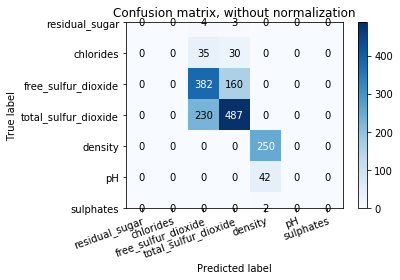

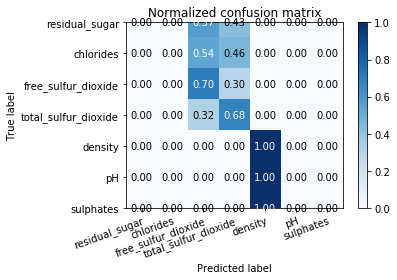

In [64]:
# Confusion matrix function

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=20, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=feature_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=feature_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
